<h1> Assignment 4 </h1>

<h3> Instructions </h3>
<p> Select three text files and they should contain atleast contain 30 paragraphs each </p> 
<p> Implement two methods of Text Summarization Techniques on the selected three files </p>
<p> Use the three selected files for evaluation and comparing the selected models</p>


<h3> References </h3>
<p> Refer the work of Nenkova, Ani and McKeown, Kathleen with the title of A survey oftext summarization techniques</p>

<h3> Importing Libraries </h3>

In [224]:
#importing various libraries for text summarization
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem import WordNetLemmatizer
import re
from matplotlib import pyplot
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from attention import AttentionLayer
from tensorflow.keras.layers import Input, Embedding, Concatenate, TimeDistributed, Dense
from tensorflow.python.keras.layers.recurrent import LSTM
from sklearn.model_selection import train_test_split
from keras import backend as K 
import tensorflow
from rouge import Rouge

[nltk_data] Downloading package stopwords to /Users/j/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1]:
from wordcloud import WordCloud

<h3> Reading the text files </h3>

In [98]:
#Reading all the three files
def open_file(file):
    text_to_list = []
    with open(file, "r", encoding="utf-8") as f1:
        text = " ".join(f1.readlines())
    text
    text_to_list.append(text)
    df = pd.DataFrame(text_to_list,columns=['Text'])
    return df

In [99]:
#calling the function to read all the three files
file1 = open_file("File1.txt")
file2 = open_file("File2.txt")
file3 = open_file("File3.txt")

In [100]:
#displaying the sample file in a pandas dataframe
file1

,Text
0,After thumping Australia in the T20I series op...


<h3> Tokenization </h3>

In [101]:
#Tokenizing the text files and flattening the list
def tokenize(text):
    sent = []
    sent_1 = []
    for s in text['Text']:
        sent.append(sent_tokenize(s))
    for i in sent:
        for j in i:
            sent_1.append(j)
    return sent_1

In [102]:
#calling tokenization function for the files
file1 = tokenize(file1)
file2 = tokenize(file2)
file3 = tokenize(file3)

In [103]:
#displaying one text file
file1

['After thumping Australia in the T20I series opener, Team India would be eyeing an assailable lead when they take the field against the hosts on December 6 in Sydney.',
 'An all-round performance helped the Indian visitors registering a comprehensive 11-run in Canberra.',
 'But unfortunately, they faced a massive blow in terms of Ravindra Jadeja’s exit with the concussion after the all-rounder was hit on his helmet.',
 'Rahul’s excellence in the shortest format has been impeccable in the recent times.',
 'After an outstanding IPL stint, he continued the momentum in Australia and scored a fifty in the Canberra fixture.',
 'He is a fixed candidate at the opening slot.',
 'Mayank’s pairing with Rahul was devastating in the recently concluded IPL.',
 'The fans would love to watch him play on international stage as well.',
 'Shikhar Dhawan’s inconsistency may lead him out of the line-up on Sunday, making way for Mayank’s T20I debut.',
 'The captain needs to fire and take the game deeper wh

<h3> Decontraction and Data Cleaning </h3>

In [104]:
#Using contraction function to perform data cleaning and decontraction of the word in the text files
def contraction(text):
    list1 = []
    for i in text:
        text = i.lower()
        text = text.replace("’", "'")
        text = text.replace("’", "'")
        text = text.replace("“", "")
        text = text.replace("”", "")
        text = text.replace("ain't", "am not")
        text = text.replace("aren't", "are not")
        text = text.replace("can't", "can not")
        text = text.replace("can't've", "can not have")
        text = text.replace("'cause", "because")
        text = text.replace("could've", "could have")
        text = text.replace("couldn't", "could not")
        text = text.replace("couldn't've", "could not have")
        text = text.replace("didn't", "did not")
        text = text.replace("doesn't", "does not")
        text = text.replace("don't", "do not")
        text = text.replace("hadn't", "had not")
        text = text.replace("hadn't've", "had not have")
        text = text.replace("hasn't", "has not")
        text = text.replace("haven't", "have not")
        text = text.replace("he'd", "he had")
        text = text.replace("he'd've", "he would have")
        text = text.replace("he'll", "he will")
        text = text.replace("he'll've", "he will have")
        text = text.replace("he's", "he has")
        text = text.replace("how'd", "how did")
        text = text.replace("how'd'y", "how do you")
        text = text.replace("how'll", "how will")
        text = text.replace("how's", "how has")
        text = text.replace("i'd", "I had")
        text = text.replace("i'd've", "I would have")
        text = text.replace("i'll", "I shall")
        text = text.replace("i'll've", "I shall have")
        text = text.replace("i'm", "I am")
        text = text.replace("im ", "I am")
        text = text.replace("i've", "I have")
        text = text.replace("isn't", "is not")
        text = text.replace("it'd", "it had")
        text = text.replace("it'd've", "it would have")
        text = text.replace("it'll", "it shall")
        text = text.replace("it'll've", "it shall have")
        text = text.replace("it's", "it has")
        text = text.replace("let's", "let us")
        text = text.replace("ma'am", "madam")
        text = text.replace("mayn't", "may not")
        text = text.replace("might've", "might have")
        text = text.replace("mightn't", "might not")
        text = text.replace("mightn't've", "might not have")
        text = text.replace("must've", "must have")
        text = text.replace("mustn't", "must not")
        text = text.replace("mustn't've", "must not have")
        text = text.replace("needn't", "need not")
        text = text.replace("needn't've", "need not have")
        text = text.replace("o'clock", "of the clock")
        text = text.replace("oughtn't", "ought not")
        text = text.replace("oughtn't've", "ought not have")
        text = text.replace("shan't", "shall not")
        text = text.replace("sha'n't", "shall not")
        text = text.replace("shan't've", "shall not have")
        text = text.replace("she'd", "she had")
        text = text.replace("she'd've", "she would have")
        text = text.replace("she'll", "she shall")
        text = text.replace("she'll've", "she shall have")
        text = text.replace("she's", "she has")
        text = text.replace("should've", "should have")
        text = text.replace("shouldn't", "should not")
        text = text.replace("shouldn't've", "should not have")
        text = text.replace("so've", "so have")
        text = text.replace("so's", "so as")
        text = text.replace("that'd", "that would")
        text = text.replace("that'd've", "that would have")
        text = text.replace("that's", "that has")
        text = text.replace("there'd", "there had")
        text = text.replace("there'd've", "there would have")
        text = text.replace("there's", "there has")
        text = text.replace("they'd", "they had")
        text = text.replace("they'd've", "they would have")
        text = text.replace("they'll", "they shall")
        text = text.replace("they'll've", "they shall have")
        text = text.replace("they're", "they are")
        text = text.replace("they've", "they have")
        text = text.replace("to've", "to have")
        text = text.replace("wasn't", "was not")
        text = text.replace("we'd", "we had")
        text = text.replace("we'd've", "we would have")
        text = text.replace("we'll", "we will")
        text = text.replace("we'll've", "we will have")
        text = text.replace("we're", "we are")
        text = text.replace("we've", "we have")
        text = text.replace("weren't", "were not")
        text = text.replace("what'll", "what shall")
        text = text.replace("what'll've", "what shall have")
        text = text.replace("what're", "what are")
        text = text.replace("what's", "what has")
        text = text.replace("what've", "what have")
        text = text.replace("when's", "when has")
        text = text.replace("when've", "when have")
        text = text.replace("where'd", "where did")
        text = text.replace("where's", "where has")
        text = text.replace("where've", "where have")
        text = text.replace("who'll", "who shall")
        text = text.replace("who'll've", "who shall have")
        text = text.replace("who's", "who has")
        text = text.replace("who've", "who have")
        text = text.replace("why's", "why has")
        text = text.replace("why've", "why have")
        text = text.replace("will've", "will have")
        text = text.replace("won't", "will not")
        text = text.replace("won't've", "will not have")
        text = text.replace("would've", "would have")
        text = text.replace("wouldn't", "would not")
        text = text.replace("wouldn't've", "would not have")
        text = text.replace("y'all", "you all")
        text = text.replace("y'all'd", "you all would")
        text = text.replace("y'all'd've", "you all would have")
        text = text.replace("y'all're", "you all are")
        text = text.replace("y'all've", "you all have")
        text = text.replace("you'd", "you had")
        text = text.replace("you'd've", "you would have")
        text = text.replace("you'll", "you shall")
        text = text.replace("you'll've", "you shall have")
        text = text.replace("you're", "you are")
        text = text.replace("you've", "you have")
        text = re.sub(r'[^a-zA-Z]+', ' ', text)
        text = re.sub(r'(\s){2,}', ' ', text)
        text = re.sub(r'^\s$', '', text)
        text = re.sub(r'[m]{2,}', 'mm', text)
        text = text.strip()
        list1.append(text)
    return list1

In [105]:
#calling decontraction function
file1 = contraction(file1)
file2 = contraction(file2)
file3 = contraction(file3)

In [106]:
#displaying the decontracted and cleaned file
file1

['after thumping australia in the t i series opener team india would be eyeing an assailable lead when they take the field against the hosts on december in sydney',
 'an all round performance helped the indian visitors registering a comprehensive run in canberra',
 'but unfortunately they faced a massive blow in terms of ravindra jadeja s exit with the concussion after the all rounder was hit on his helmet',
 'rahul s excellence in the shortest format has been impeccable in the recent times',
 'after an outstanding ipl stint he continued the momentum in australia and scored a fifty in the canberra fixture',
 'he is a fixed candidate at the opening slot',
 'mayank s pairing with rahul was devastating in the recently concluded ipl',
 'the fans would love to watch hI amplay on international stage as well',
 'shikhar dhawan s inconsistency may lead hI amout of the line up on sunday making way for mayank s t i debut',
 'the captain needs to fire and take the game deeper which he could not d

In [107]:
#remvoving null list values from the files and creating a new dataframe to append the textual data
def bad_rows(text):
    text = list(filter(None,text))
    df = pd.DataFrame(text,columns=['Text'])
    return df

In [108]:
#calling bad_rows function
file1 = bad_rows(file1)
file2 = bad_rows(file2)
file3 = bad_rows(file3)

In [109]:
#displaying the one of the textual data in a dataframe
file1

,Text
0,after thumping australia in the t i series ope...
1,an all round performance helped the indian vis...
2,but unfortunately they faced a massive blow in...
3,rahul s excellence in the shortest format has ...
4,after an outstanding ipl stint he continued th...
...,...
83,the fact that jadeja did not seek medical atte...
84,I have said for years I had like to see player...
85,the laws are there to protect them and make th...
86,just make sure they are used correctly that ha...


<h3> Visualization - Before applying stopwords Removal and Lemmatization </h3>

In [110]:
#Calculating the count of each word occurences - before
def word_occurence(df):
    words = df['Text'].str.split(expand=True).unstack().value_counts()
    return words

In [111]:
#calling word_occurence function
words_list_before_1 = word_occurence(file1)
words_list_before_2 = word_occurence(file2)
words_list_before_3 = word_occurence(file3)

In [112]:
#bar graph to represent the most frequent words
def freq_word(df):
    init_notebook_mode(connected=True)
    data = [go.Bar(
                x = df.index.values[0:50],
                y = df.values[0:50],
                marker= dict(colorscale='Viridis',color = df.values[0:100]),text='Word counts')]
    layout = go.Layout(title='Frequent occuring words')
    fig = go.Figure(data=data, layout=layout)
    return fig

In [113]:
#calling freq_word function
words_list_before_bar_1 = freq_word(words_list_before_1)
words_list_before_bar_2 = freq_word(words_list_before_2)
words_list_before_bar_3 = freq_word(words_list_before_3)

In [114]:
#displaying the bar chart for each files
iplot(words_list_before_bar_1, filename='basic-bar')
iplot(words_list_before_bar_2, filename='basic-bar')
iplot(words_list_before_bar_3, filename='basic-bar')

In [115]:
#Word Cloud to represent the most frequent words
def wordcloud(df):
    wordcloud = WordCloud(background_color='white', max_words = 100).generate_from_frequencies(df)
    return wordcloud

In [116]:
#calling the wordcloud function
wordcloud_before_1 = wordcloud(words_list_before_1)
wordcloud_before_2 = wordcloud(words_list_before_2)
wordcloud_before_3 = wordcloud(words_list_before_3)

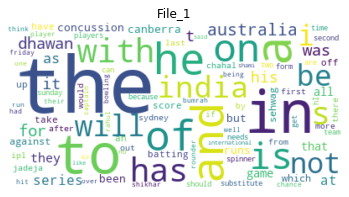

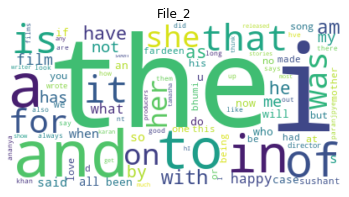

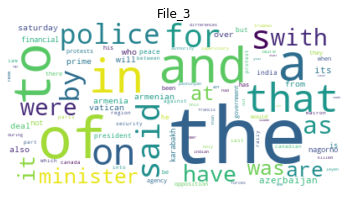

In [117]:
#displaying the worldcloud generated for all three files
plt.imshow(wordcloud_before_1, interpolation='bilinear')
plt.axis("off")
plt.title('File_1')
plt.show()
plt.imshow(wordcloud_before_2, interpolation='bilinear')
plt.axis("off")
plt.title('File_2')
plt.show()
plt.imshow(wordcloud_before_3, interpolation='bilinear')
plt.axis("off")
plt.title('File_3')
plt.show()

<h3> Stopwords Removal and Lemmatization </h3>

In [118]:
#obtaining the english stopwords from the stopwords library
stopwords_removal = stopwords.words('english')

In [119]:
#Stopwords removal and Lemmatization of textual data
def Lemmatizaton(df):
    lemmatization = WordNetLemmatizer()
    for ind, text in enumerate(df['Text']):
        temp = []
        for word in str(text).split():
            word = word.strip()
            if word not in stopwords_removal and word.isalpha():
                lemmatize_word = lemmatization.lemmatize(word)
                temp.append(lemmatize_word)
                df.loc[ind,'Text'] = str(" ".join(temp))
    return df

In [120]:
#calling the lemmatization function
file1 = Lemmatizaton(file1)
file2 = Lemmatizaton(file2)
file3 = Lemmatizaton(file3)

In [121]:
#displaying one file in dataframe after Stopwords removal and Lemmatization
file1

,Text
0,thumping australia series opener team india wo...
1,round performance helped indian visitor regist...
2,unfortunately faced massive blow term ravindra...
3,rahul excellence shortest format impeccable re...
4,outstanding ipl stint continued momentum austr...
...,...
83,fact jadeja seek medical attention immediately...
84,I said year I like see player coach take respo...
85,law protect make game better player
86,make sure used correctly would say taylor said


<h3> Visualization - After applying stopwords Removal and Lemmatization </h3>

In [122]:
#calling word_occurence function
words_list_after_1 = word_occurence(file1)
words_list_after_2 = word_occurence(file2)
words_list_after_3 = word_occurence(file3)

In [123]:
#calling freq_word function
words_list_after_bar_1 = freq_word(words_list_after_1)
words_list_after_bar_2 = freq_word(words_list_after_2)
words_list_after_bar_3 = freq_word(words_list_after_3)

In [124]:
#displaying the bar chart for each files
iplot(words_list_after_bar_1, filename='basic-bar')
iplot(words_list_after_bar_2, filename='basic-bar')
iplot(words_list_after_bar_3, filename='basic-bar')

In [125]:
#calling the wordcloud function
wordcloud_after_1 = wordcloud(words_list_after_1)
wordcloud_after_2 = wordcloud(words_list_after_2)
wordcloud_after_3 = wordcloud(words_list_after_3)

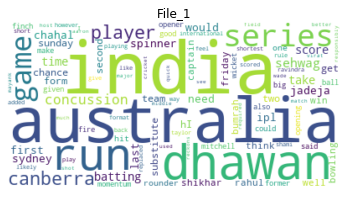

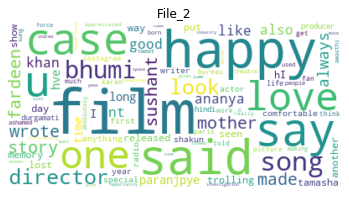

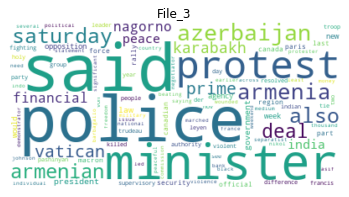

In [126]:
#displaying the worldcloud generated for all three files
plt.imshow(wordcloud_after_1, interpolation='bilinear')
plt.axis("off")
plt.title('File_1')
plt.show()
plt.imshow(wordcloud_after_2, interpolation='bilinear')
plt.axis("off")
plt.title('File_2')
plt.show()
plt.imshow(wordcloud_after_3, interpolation='bilinear')
plt.axis("off")
plt.title('File_3')
plt.show()

<h3> Feature Engineering </h3>
<h4> Word Embedding - Glove </h4>

In [127]:
#opening and storing the Glove vectors for each word in an dictionary
word_embed_glove = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    data = line.split()
    words = data[0]
    coeffs = np.asarray(data[1:], dtype='float32')
    word_embed_glove[words] = coeffs
f.close()

In [128]:
#Using a function to obtain the Glove vectors for a word and taking their mean to understand the vectors for a sentence
def feature(df):
    vectors = []
    for i in df['Text']:
        if len(i) != 0:
            y = sum([word_embed_glove.get(w, np.zeros((100,))) for w in i.split()])
            x = (len(i.split())+0.001)
            v = y/x
        else:
            v = np.zeros((100,))
        vectors.append(v)
    return vectors

In [129]:
#calling the function feature to perform feature engineering
file_features1 = feature(file1)
file_features2 = feature(file2)
file_features3 = feature(file3)

In [130]:
#displaying the created feature in vectors for one file
file_features1

[array([-1.86616820e-01,  1.00552066e-01,  4.49871883e-01, -2.91809077e-01,
        -3.97126460e-02, -1.03090265e-01, -2.08948116e-02,  4.06707811e-01,
        -6.87171183e-01, -1.09742274e-01,  8.70128713e-02, -2.61070598e-01,
         2.20519949e-02,  1.53987034e-01, -6.73938352e-02, -1.26977889e-01,
         1.21091400e-01,  2.41649227e-01, -2.59569356e-01,  3.23120500e-02,
         2.88233601e-01, -1.45108324e-01,  3.06942194e-01,  3.27341983e-01,
         2.89297058e-01, -1.17946808e-01,  9.98394031e-02,  6.42520471e-02,
         2.48365436e-01, -3.44936939e-02, -5.15373573e-01,  3.93987864e-01,
        -7.24025082e-02,  7.05801596e-02,  1.02480482e-01, -6.98362841e-02,
        -3.01093001e-01,  1.79869603e-01, -5.07515498e-01,  2.80984599e-02,
        -3.06061933e-01, -1.04868875e-01,  2.37709049e-01, -3.09732739e-01,
         2.65097204e-01,  7.20897937e-02,  2.38694135e-01, -1.14945451e-01,
         7.51823166e-02, -5.32048986e-01, -2.16380038e-01,  1.11695631e-01,
         9.7

In [131]:
#displaying the length of files consisting of features
print(len(file_features1))
print(len(file_features2))
print(len(file_features3))

88
102
85


<h3> Model - 1 </h3>

In [132]:
#function creates a matrix of numpy array of zeros based on the length of each file
def matrices(df):
    matrix = np.zeros([len(df), len(df)])
    return matrix

In [133]:
#calling the matrices function
file_matrix_1 = matrices(file1)
file_matrix_2 = matrices(file2)
file_matrix_3 = matrices(file3)

<h3> Calculating the cosine similarity within sentences </h3>

In [134]:
#finding the similarities between adjacent sentences and store the values in the created matrix for file 1
for i in range(len(file1)):
    for j in range(len(file1)):
        if i != j:
            x = file_features1[i].reshape(1,100)
            y = file_features1[j].reshape(1,100)
            file_matrix_1[i][j] = cosine_similarity(x,y)[0,0]

In [135]:
#finding the similarities between adjacent sentences and store the values in the created matrix for file 2
for i in range(len(file2)):
    for j in range(len(file2)):
        if i != j:
            m = file_features2[i].reshape(1,100)
            n = file_features2[j].reshape(1,100)
            file_matrix_2[i][j] = cosine_similarity(m,n)[0,0]

In [136]:
#finding the similarities between adjacent sentences and store the values in the created matrix for file 3
for i in range(len(file3)):
    for j in range(len(file3)):
        if i != j:
            l = file_features3[i].reshape(1,100)
            k = file_features3[j].reshape(1,100)
            file_matrix_3[i][j] = cosine_similarity(l,k)[0,0]

<h3> Applying the PageRank Algorithm and calculating the scores</h3>

In [137]:
#function networkx is used to evaluate the page rank scores for the created matrices
def networkx(df):
    nw = nx.from_numpy_array(df)
    score = nx.pagerank(nw)
    return score

In [138]:
#calling the networkx function
file_matrix_score_1 = networkx(file_matrix_1)
file_matrix_score_2 = networkx(file_matrix_2)
file_matrix_score_3 = networkx(file_matrix_3)

In [139]:
#displaying the pagerank scores for one matrix file
file_matrix_score_3

{0: 0.012813116013631505,
 1: 0.013028480340970651,
 2: 0.012144094370386327,
 3: 0.012436821742528815,
 4: 0.012486927027637734,
 5: 0.01197028458553669,
 6: 0.012529945643945646,
 7: 0.010770316599301458,
 8: 0.011215709634548977,
 9: 0.01207276017513041,
 10: 0.012649627692681286,
 11: 0.012076622938115403,
 12: 0.010257193881136068,
 13: 0.008889039447694667,
 14: 0.008379984150054658,
 15: 0.009200431568378489,
 16: 0.012218876283949619,
 17: 0.012232819376701645,
 18: 0.011748805218626944,
 19: 0.012138172288325916,
 20: 0.01225474853334186,
 21: 0.012363519286690059,
 22: 0.011711743007723405,
 23: 0.010885920872038218,
 24: 0.012476029157758802,
 25: 0.01143116080756158,
 26: 0.010885758226168853,
 27: 0.0102096130812807,
 28: 0.011750434234424298,
 29: 0.01100301713901545,
 30: 0.009536012905967055,
 31: 0.01271293117480697,
 32: 0.011948671209151659,
 33: 0.012223272866425222,
 34: 0.011839138556759596,
 35: 0.01224363715652059,
 36: 0.011485520434170313,
 37: 0.0120919175188

In [140]:
#combining the textual data and the pagerank scores for each sentences in each file
#sorted based on the highest pagerank scores first
rank_file_1 = ((file_matrix_score_1[i],j) for i,j in enumerate(file1['Text']))
rank_file_1 = sorted(rank_file_1,reverse=True)
rank_file_2 = ((file_matrix_score_2[i],j) for i,j in enumerate(file2['Text']))
rank_file_2 = sorted(rank_file_2, reverse=True)
rank_file_3 = ((file_matrix_score_3[i],j) for i,j in enumerate(file3['Text']))
rank_file_3 = sorted(rank_file_3, reverse=True)                

<h3> Output </h3>
<h4> Text Summaries of file 1, file 2, file 3</h4>

In [141]:
#displaying the combined file 1
rank_file_1

[(0.012516036444607932,
  'form ipl two century think left next two experience fire play good cricket contribute team former australia captain mark taylor cautioned abusing concussion substitute rule saying protection player need used fairly responsibly'),
 (0.01236368816284551,
  'australia hand look return winning way bid level series'),
 (0.012333149743375883,
  'time difficult opener score run condition good bowling attack'),
 (0.012325192374967382,
  'agile field need find among run well red hot form right beginning india tour australia'),
 (0.012320229988735588, 'gone stage easy score run australia new ball'),
 (0.01231185401684116,
  'although one odis think scored run could convert big score explained sehwag'),
 (0.012273994831653987,
  'team india would looking forward seal series gear square australia second match sunday sydney'),
 (0.012262412951192181,
  'shikhar dhawan coming brilliant ipl season saw hI amscore run emerge second highest run scorer tournament perhaps disapp

In [142]:
#number of sentence for summary
#Generating the summary for each file - 1
def summary(df):
    lines = 12
    list1=[]
    for i in range(lines):
        list1.append(df[i][1])
    return list1

In [143]:
rank_file_1 = summary(rank_file_1)
rank_file_2 = summary(rank_file_2)
rank_file_3 = summary(rank_file_3)

In [144]:
#Print the summary - file 1
for i in rank_file_1:
    print(i)

form ipl two century think left next two experience fire play good cricket contribute team former australia captain mark taylor cautioned abusing concussion substitute rule saying protection player need used fairly responsibly
australia hand look return winning way bid level series
time difficult opener score run condition good bowling attack
agile field need find among run well red hot form right beginning india tour australia
gone stage easy score run australia new ball
although one odis think scored run could convert big score explained sehwag
team india would looking forward seal series gear square australia second match sunday sydney
shikhar dhawan coming brilliant ipl season saw hI amscore run emerge second highest run scorer tournament perhaps disappointing see hI amget cheaply australia first canberra friday
due onus india top six put better show
chahal went play major role india run win figure
feel little time given shikhar dhawan also take time playing sehwag said sony sport 

In [145]:
#Print the summary - file 2
for i in rank_file_2:
    print(i)

never moment sit scratch head say shall say adding mentioned unpleasant memory taken ride producer left peanut producer made king size profit film
look back think change anything enjoyed making film writing story putting together
omg wow look much better even younger day third wrote
young actor like gesture boosted confidence top film producer consider good performer sure project I associated success
wow good see hI amback one wrote
talking kareena ananya said initially started dressing way probably made everyone happy
durgamati film always special always proud akshay sir thought could shoulder
one look filmography even unaccustomed point film like sparsh chashme buddoor katha importance attached legacy left behind inadvertently
long happy get good picture put instagram fine added
one night ran said tell story said bad told said one made
although say write every day three four page allowed play
guess born say paranjpye credit mother bringing love storytelling


In [146]:
#Print the summary - file 3
for i in rank_file_3:
    print(i)

daily medium interaction pandemic trudeau asked demarche issued indian government said canada always stand right peaceful protest anywhere around world pleased see move toward de escalation dialogue even pro farmer group staged punjab kisaan car rally indian high commission ottawa top indo canadian organisation canada india foundation cif expressed anguish adverse impact trudeau statement already tie said hasty tweet quick comment leader responsible position canada known roil calm water
russian troop also ensure safe transit nagorno karabakh armenia across lachin region pope francis revamped holy see financial intelligence anti money laundering unit following financial scandal including ongoing house corruption probe vatican official said saturday
canadian prime minister justin trudeau reiterated support peaceful protest india farm law tried soften stance damage control exercise may come late indo canadian group expressed disappointment harm caused bilateral tie
new clash came macron g

<h3> Model - 2</h3>

<h3> Seq2Seq Modeling </h3>

<h4> Read the training dataset </h4>

In [147]:
#reading the train dataset
train_data=pd.read_csv("news_train.csv", nrows=10000)

#diplaying sample columns the train dataset
train_data.head()

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


In [148]:
#Rename the column from headlines to summary
train_data = train_data.rename(columns={"headlines": "Summary", "text": "Text"})

In [149]:
#display the train data
train_data

,Summary,Text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...
...,...,...
9995,"16-yr-old killed, 8 injured as car hits 5 vehi...",A 16-year-old girl was killed and eight others...
9996,K'taka govt proposes to build 125-ft Mother Ca...,The Karnataka government has proposed to build...
9997,53-year-old fashion designer murdered by her t...,A 53-year-old fashion designer named Mala Lakh...
9998,14-year-old killed by another teenager over a ...,A 14-year-old boy in West Bengal's Bankura die...


<h4> Remove Duplicates and drop NA values </h4>

In [150]:
#removing duplicates and dropping the Null values
train_data.drop_duplicates(subset=['Text','Summary'],inplace=True)
train_data.dropna(axis=0,inplace=True)
train_data.reset_index(drop=True, inplace=True)
train_data

,Summary,Text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...
...,...,...
9995,"16-yr-old killed, 8 injured as car hits 5 vehi...",A 16-year-old girl was killed and eight others...
9996,K'taka govt proposes to build 125-ft Mother Ca...,The Karnataka government has proposed to build...
9997,53-year-old fashion designer murdered by her t...,A 53-year-old fashion designer named Mala Lakh...
9998,14-year-old killed by another teenager over a ...,A 14-year-old boy in West Bengal's Bankura die...


<h3> Data Preprocessing </h3>
<h3> Data Cleaning </h3>
<h4> De-contraction </h4>

In [151]:
#calling decontraction and cleaning function
train_data['Text'] = contraction(train_data['Text'])
train_data['Summary'] = contraction(train_data['Summary'])

In [152]:
#displaying the train data after preprocessing
train_data

,Summary,Text
0,upgrad learner switches to career in ml al wit...,saurav kant an alumnus of upgrad and iiit b s ...
1,delhi techie wins free food from swiggy for on...,kunal shah s credit card bill payment platform...
2,new zealand end rohit sharma led india s match...,new zealand defeated india by wickets in the f...
3,aegon life iterm insurance plan helps customer...,with aegon life iterm insurance plan customers...
4,have known hirani for yrs what if metoo claims...,speaking about the sexual harassment allegatio...
...,...,...
9995,yr old killed injured as car hits vehicles in ...,a year old girl was killed and eight others we...
9996,k taka govt proposes to build ft mother cauver...,the karnataka government has proposed to build...
9997,year old fashion designer murdered by her tail...,a year old fashion designer named mala lakhani...
9998,year old killed by another teenager over a gam...,a year old boy in west bengal s bankura died o...


In [153]:
#drop null columns and reset the index
train_data.replace('', np.nan, inplace=True)
train_data.dropna(axis=0,inplace=True)
train_data.reset_index(drop=True, inplace=True)

In [154]:
#displaying the train data
train_data

,Summary,Text
0,upgrad learner switches to career in ml al wit...,saurav kant an alumnus of upgrad and iiit b s ...
1,delhi techie wins free food from swiggy for on...,kunal shah s credit card bill payment platform...
2,new zealand end rohit sharma led india s match...,new zealand defeated india by wickets in the f...
3,aegon life iterm insurance plan helps customer...,with aegon life iterm insurance plan customers...
4,have known hirani for yrs what if metoo claims...,speaking about the sexual harassment allegatio...
...,...,...
9995,yr old killed injured as car hits vehicles in ...,a year old girl was killed and eight others we...
9996,k taka govt proposes to build ft mother cauver...,the karnataka government has proposed to build...
9997,year old fashion designer murdered by her tail...,a year old fashion designer named mala lakhani...
9998,year old killed by another teenager over a gam...,a year old boy in west bengal s bankura died o...


In [155]:
#function calculating the length of the sentences
def count(df):
    count = []
    for i in df:
        count.append(len(i.split()))
    return count

In [156]:
#calculate the text word and summary word counts
text_word_count = count(train_data['Text'])
summary_word_count = count(train_data['Summary'])

In [157]:
#combining the length of text and summary as a list and store in a dataframe
length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})

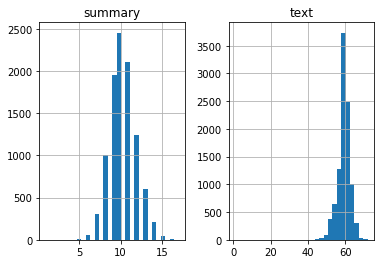

In [158]:
#display the histogram for the length of words in a sentence
length_df.hist(bins = 30)
plt.show()

In [159]:
#maximum threshold for the length of texts and summaries
max_summary_len=12
max_text_len=64

In [160]:
#function short to filter out texts and summaries above the max_len of texts and summary
def short(df_1,max_summ, max_text):
    text =np.array(df_1['Text'])
    summary=np.array(df_1['Summary'])
    short_text=[]
    short_summary=[]
    for i in np.arange(0,len(text),1):
        sum_len = len(summary[i].split())
        text_len = len(text[i].split())
        if(sum_len <=max_summ and text_len <=max_text):
            short_text.append(text[i])
            short_summary.append(summary[i])
    df=pd.DataFrame({'text':short_text,'summary':short_summary})
    return df

In [161]:
#calling short function to filter the texts and summary
train_data = short(train_data,max_summary_len, max_text_len)

In [162]:
#displaying the train data
train_data

,text,summary
0,saurav kant an alumnus of upgrad and iiit b s ...,upgrad learner switches to career in ml al wit...
1,kunal shah s credit card bill payment platform...,delhi techie wins free food from swiggy for on...
2,new zealand defeated india by wickets in the f...,new zealand end rohit sharma led india s match...
3,with aegon life iterm insurance plan customers...,aegon life iterm insurance plan helps customer...
4,pakistani singer rahat fateh ali khan has deni...,rahat fateh ali khan denies getting notice for...
...,...,...
8883,a year old girl was killed and eight others we...,yr old killed injured as car hits vehicles in ...
8884,the karnataka government has proposed to build...,k taka govt proposes to build ft mother cauver...
8885,a year old fashion designer named mala lakhani...,year old fashion designer murdered by her tail...
8886,a year old boy in west bengal s bankura died o...,year old killed by another teenager over a gam...


In [163]:
#drop null columns and reset the index
train_data.replace('', np.nan, inplace=True)
train_data.dropna(axis=0,inplace=True)
train_data.reset_index(drop=True, inplace=True)
train_data

,text,summary
0,saurav kant an alumnus of upgrad and iiit b s ...,upgrad learner switches to career in ml al wit...
1,kunal shah s credit card bill payment platform...,delhi techie wins free food from swiggy for on...
2,new zealand defeated india by wickets in the f...,new zealand end rohit sharma led india s match...
3,with aegon life iterm insurance plan customers...,aegon life iterm insurance plan helps customer...
4,pakistani singer rahat fateh ali khan has deni...,rahat fateh ali khan denies getting notice for...
...,...,...
8883,a year old girl was killed and eight others we...,yr old killed injured as car hits vehicles in ...
8884,the karnataka government has proposed to build...,k taka govt proposes to build ft mother cauver...
8885,a year old fashion designer named mala lakhani...,year old fashion designer murdered by her tail...
8886,a year old boy in west bengal s bankura died o...,year old killed by another teenager over a gam...


In [164]:
#append start and end string name at the beginning and at the very end of each summary string
for ind, row in train_data.iterrows():
    x = "start " + row['summary'] + " end"
    train_data.loc[ind,'summary_1'] = str("".join(x)) 

In [165]:
#display the summary string after appending the start and end strings
train_data['summary_1']

0       start upgrad learner switches to career in ml ...
1       start delhi techie wins free food from swiggy ...
2       start new zealand end rohit sharma led india s...
3       start aegon life iterm insurance plan helps cu...
4       start rahat fateh ali khan denies getting noti...
                              ...                        
8883    start yr old killed injured as car hits vehicl...
8884    start k taka govt proposes to build ft mother ...
8885    start year old fashion designer murdered by he...
8886    start year old killed by another teenager over...
8887    start arcelormittal can not do a jio in indian...
Name: summary_1, Length: 8888, dtype: object

In [166]:
#drop the unecessary column and rename it
train_data = train_data.drop(columns=['summary'])
train_data = train_data.rename(columns={'summary_1':'summary'})

<h3>Splitting of the dataset into train and validation sets</h3>

In [167]:
#splitting the dataset into train and validation
x_train,x_valid,y_train,y_valid=train_test_split(np.array(train_data['text']),np.array(train_data['summary']),test_size=0.1,random_state=0,shuffle=True)

In [168]:
#Function histogram calculated the count of words in a sentence
def histogram(df):
    text_word_count_file = []
    for i in df['Text']:
        text_word_count_file.append(len(i.split()))
    length_df = pd.DataFrame({'text':text_word_count_file})
    return length_df


In [169]:
#calling the histogram function to calculate the count of words
length_df_1 = histogram(file1)
length_df_2 = histogram(file2)
length_df_3 = histogram(file3)

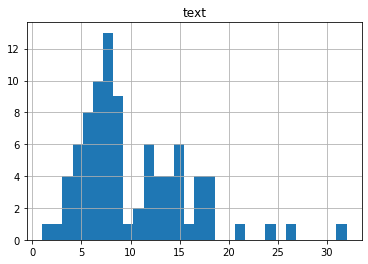

In [170]:
#displaying the histogram for file 1
length_df_1.hist(bins = 30)
plt.show()

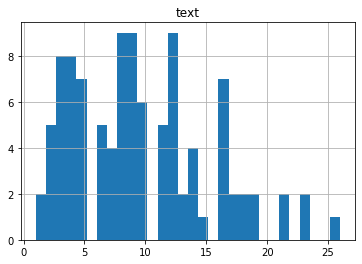

In [171]:
#displaying the histogram for file 2
length_df_2.hist(bins = 30)
plt.show()

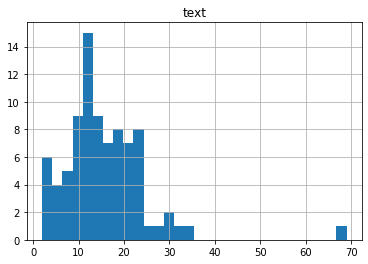

In [172]:
#displaying the histogram for file 3
length_df_3.hist(bins = 30)
plt.show()

In [173]:
#function to filter out the summary and text more than the max_len specified.
def short1(df, max_len):
    preprocessed_data_text =np.array(df['Text'])
    limit_text=[]
    for i in np.arange(0,len(preprocessed_data_text),1):
        y = len(preprocessed_data_text[i].split())
        if(y <=max_len):
            limit_text.append(preprocessed_data_text[i])
            df_text =pd.DataFrame({'text':limit_text})
    return df_text

In [174]:
#calling the function short to filter out values
df_file_1 = short1(file1,max_text_len)
df_file_2 = short1(file2,max_text_len)
df_file_3 = short1(file3,max_text_len)

In [175]:
#converting the test files into numpy array
file1 = np.array(df_file_1['text'])
file2 = np.array(df_file_2['text'])
file3 = np.array(df_file_3['text'])

In [176]:
#function to calculate the rarewords in the dataset
def rarewords(df,thres):
    tokenizer = Tokenizer() 
    tokenizer.fit_on_texts(list(df))
    thresh= thres
    cnt=0
    tot_cnt=0
    freq=0
    tot_freq=0
    for key,value in tokenizer.word_counts.items():
        tot_cnt=tot_cnt+1
        tot_freq=tot_freq+value
        if(value<thresh):
            cnt=cnt+1
            freq=freq+value
    return cnt, tot_cnt, freq, tot_freq

In [177]:
#calling the rarewords function to calculate the percentage and coverage of rarewords
cnt1, tot_cnt1, freq1, tot_freq1 = rarewords(file1, 2)
cnt2, tot_cnt2, freq2, tot_freq2 = rarewords(file2, 2)
cnt3, tot_cnt3, freq3, tot_freq3 = rarewords(file3, 2)
cntx, tot_cntx, freqx, tot_freqx = rarewords(x_train, 4)
cnty, tot_cnty, freqy, tot_freqy = rarewords(y_train, 6)

In [178]:
#printing the percentage and coverage of rarewords for test data, train data, validation data
print("% of rare words in vocabulary for file1:",(cnt1/tot_cnt1)*100)
print("Total Coverage of rare words for file1:",(freq1/tot_freq1)*100)
print("\n")
print("% of rare words in vocabulary for file2:",(cnt2/tot_cnt2)*100)
print("Total Coverage of rare words for file2:",(freq2/tot_freq2)*100)
print("\n")
print("% of rare words in vocabulary for file3:",(cnt3/tot_cnt3)*100)
print("Total Coverage of rare words for file3:",(freq3/tot_freq3)*100)
print("\n")
print("% of rare words in vocabulary for file3:",(cntx/tot_cntx)*100)
print("Total Coverage of rare words for file3:",(freqx/tot_freqx)*100)
print("\n")
print("% of rare words in vocabulary for file3:",(cnty/tot_cnty)*100)
print("Total Coverage of rare words for file3:",(freqy/tot_freqy)*100)

% of rare words in vocabulary for file1: 70.46332046332047
Total Coverage of rare words for file1: 39.93435448577681


% of rare words in vocabulary for file2: 74.04580152671755
Total Coverage of rare words for file2: 50.103305785123965


% of rare words in vocabulary for file3: 70.79407806191116
Total Coverage of rare words for file3: 42.08


% of rare words in vocabulary for file3: 63.55019892347297
Total Coverage of rare words for file3: 5.218378726505432


% of rare words in vocabulary for file3: 79.821704097377
Total Coverage of rare words for file3: 17.45735328059758


In [179]:
#intiliazing the tokenizer
x_tokenizer = Tokenizer(num_words=tot_cntx-cntx) 
x_tokenizer.fit_on_texts(list(x_train))

y_tokenizer = Tokenizer(num_words=tot_cnty-cnty) 
y_tokenizer.fit_on_texts(list(y_train))

In [182]:
#text to sequence function
def text_seq(tokenizer, df, tot_cnt, cnt, max_len):
    seq    =   tokenizer.texts_to_sequences(df)
    text_summ    =   pad_sequences(seq,  maxlen=max_len, padding='post')
    return text_summ

In [183]:
#convert text sequences into integer sequences
#padding zero upto maximum length
x_train = text_seq(x_tokenizer,x_train, tot_cntx, cntx, max_text_len)
x_valid = text_seq(x_tokenizer,x_valid, tot_cntx, tot_cntx, max_text_len)
x_test_1 = text_seq(x_tokenizer,file1, tot_cntx, tot_cntx, max_text_len)
x_test_2 = text_seq(x_tokenizer,file2, tot_cntx, tot_cntx, max_text_len)
x_test_3 = text_seq(x_tokenizer,file3, tot_cntx, tot_cntx, max_text_len)
y_train = text_seq(y_tokenizer, y_train, tot_cnty, cnty, max_summary_len)
y_valid = text_seq(y_tokenizer, y_valid, tot_cnty, cnty, max_summary_len)

In [184]:
#size of vocabulary
x_voc   =  x_tokenizer.num_words + 1
x_voc

9346

In [185]:
#size of vocabulary
y_voc  =   y_tokenizer.num_words +1
y_voc

2355

In [186]:
y_tokenizer.word_counts['start'],len(y_train)

(8009, 7999)

In [187]:
ind=[]
for i in range(len(y_train)):
    cnt=0
    for j in y_train[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_train=np.delete(y_train,ind, axis=0)
x_train=np.delete(x_train,ind, axis=0)

In [188]:
ind=[]
for i in range(len(y_valid)):
    cnt=0
    for j in y_valid[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_valid=np.delete(y_valid,ind, axis=0)
x_valid=np.delete(x_valid,ind, axis=0)

In [189]:
len(y_train)

7997

<h3> Model Building </h3>
<h4> Building a 3 stacked LTSM </h4> 

In [190]:
#embedding layer
# Encoder
#encoder lstm 1
#encoder lstm 2
#encoder lstm 3
# Set up the decoder, using `encoder_states` as initial state.
#embedding layer
# Attention layer
# Concat attention input and decoder LSTM output
# Define the model 
#dense layer
#compiling the model with standard values for loss and optimizer

K.clear_session()

latent_dim = 300
embedding_dim=100
encoder_inputs = Input(shape=(max_text_len,))
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)
model = tensorflow.keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 64, 100)      934600      input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 64, 300), (N 481200      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
_______________________________________________________________________________________

In [192]:
#implementation of early stopping
es = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)


In [193]:
#training the Model with train data
graph=model.fit([x_train,y_train[:,:-1]], y_train.reshape(y_train.shape[0],y_train.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=128, validation_data=([x_valid,y_valid[:,:-1]], y_valid.reshape(y_valid.shape[0],y_valid.shape[1], 1)[:,1:]))

Epoch 1/50
63/63 [==============================] - 299s 5s/step - loss: 5.3326 - val_loss: 4.7955
Epoch 2/50
63/63 [==============================] - 272s 4s/step - loss: 4.8993 - val_loss: 4.6806
Epoch 3/50
63/63 [==============================] - 271s 4s/step - loss: 4.7731 - val_loss: 4.5798
Epoch 4/50
63/63 [==============================] - 259s 4s/step - loss: 4.6525 - val_loss: 4.4989
Epoch 5/50
63/63 [==============================] - 259s 4s/step - loss: 4.5554 - val_loss: 4.4691
Epoch 6/50
63/63 [==============================] - 257s 4s/step - loss: 4.4632 - val_loss: 4.4103
Epoch 7/50
63/63 [==============================] - 256s 4s/step - loss: 4.3610 - val_loss: 4.3428
Epoch 8/50
63/63 [==============================] - 260s 4s/step - loss: 4.2543 - val_loss: 4.2495
Epoch 9/50
63/63 [==============================] - 256s 4s/step - loss: 4.1545 - val_loss: 4.2181
Epoch 10/50
63/63 [==============================] - 262s 4s/step - loss: 4.0569 - val_loss: 4.1758
Epoch 11/

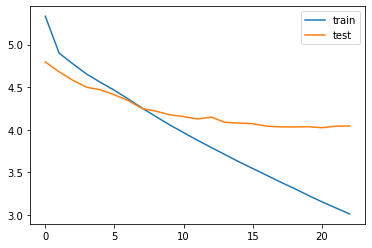

In [195]:
#plotting the history graph of the model
pyplot.plot(graph.history['loss'], label='train')
pyplot.plot(graph.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [196]:
#assigning the tokenized words 
rev_target_word_ind = y_tokenizer.index_word
rev_source_word_ind = x_tokenizer.index_word
target_word_ind = y_tokenizer.word_index

In [197]:
# Encode the input sequence to get the feature vector
# Decoder setup
# Below tensors will hold the states of the previous time step
# Get the embeddings of the decoder sequence
# To predict the next word in the sequence, set the initial states to the states from the previous time step
#attention inference
# A dense softmax layer to generate prob dist. over the target vocabulary
# Final decoder model

encoder_model = tensorflow.keras.Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))
dec_emb2= dec_emb_layer(decoder_inputs) 
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])
decoder_outputs2 = decoder_dense(decoder_inf_concat) 
decoder_model = tensorflow.keras.Model([decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],[decoder_outputs2] + [state_h2, state_c2])

In [200]:
#decode_sequence function to decode the encoded value
# Encode the input as state vectors.
# Generate empty target sequence of length 1.
# Populate the first word of target sequence with the start word.
# Sample a token
# Exit condition: either hit max length or find stop word.
# Update the target sequence (of length 1).
# Update internal states

def decode_sequence(input_seq):
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = target_word_ind['start']
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = rev_target_word_ind[sampled_token_index]
        if(sampled_token!='end'):
            decoded_sentence += ' '+sampled_token
        if (sampled_token == 'end'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index
        e_h, e_c = h, c
    return decoded_sentence

<h3> test files </h3>

In [209]:
file_1_predict = []
for i in range(0,12):
    x = decode_sequence(x_test_1[i].reshape(1,max_text_len))
    file_1_predict.append(x)

 india s first day on india
 rahul launches rahul for rahul rahul
 india s ki rahul rahul
 priyanka to hear priyanka s
 india s first day rahul
 rahul launches rahul for rahul
 priyanka priyanka s wedding rahul in
 priyanka to appear with rahul
 to priyanka with rahul s
 priyanka to hear rahul s rahul
 rahul rahul rahul khan to rahul rahul
 priyanka rahul s rahul for rahul


In [217]:
file_2_predict = []
for i in range(0,12):
    x = decode_sequence(x_test_2[i].reshape(1,max_text_len))
    file_2_predict.append(x)

In [220]:
file_3_predict = []
for i in range(0,12):
    x = decode_sequence(x_test_3[i].reshape(1,max_text_len))
    file_3_predict.append(x)

In [215]:
#Print the summary - file 1 - Model 2
for i in file_1_predict:
    print(i)

 pm modi to be in pm
 rahul to hear irani irani
 india to be on rahul
 congress minister irani irani irani
 amazon announces new rahul
 india to hear rahul s
 rahul rahul rahul khan to rahul
 scientists of of
 priyanka to hear irani irani
 rahul rahul s rahul to rahul rahul
 rahul rahul to rafale rahul minister minister
 priyanka to hear rahul s


In [218]:
#Print the summary - file 1 - Model 2
for i in file_2_predict:
    print(i)

 priyanka to hear priyanka s
 rahul khan khan khan khan khan khan khan
 rahul khan khan khan khan khan khan minister
 priyanka to hear priyanka s
 rahul khan khan khan khan khan khan minister
 priyanka rahul launches rahul for rahul
 priyanka gifts to rahul karan
 rahul to pandya rahul s
 rahul rahul s rahul khan s
 rahul rahul irani for rahul rahul
 priyanka s first wedding rahul
 rahul rahul s rahul khan khan s


In [221]:
#Print the summary - file 1 - Model 2
for i in file_3_predict:
    print(i)

 pm modi to be in pm
 rahul to hear irani irani
 india to be on rahul
 congress minister irani irani irani
 amazon announces new rahul
 india to hear rahul s
 rahul rahul rahul khan to rahul
 scientists of of
 priyanka to hear irani irani
 rahul rahul s rahul to rahul rahul
 rahul rahul to rafale rahul minister minister
 priyanka to hear rahul s


<h4> Comparison between Model 1 and Model 1 </h4>

In [230]:
#file 1 Model 1 & Model 2
rouge = Rouge()
scores_1 = rouge.get_scores(rank_file_1, file_1_predict)

In [231]:
#file 3 Model 1 & Model 2
rouge = Rouge()
scores_2 = rouge.get_scores(rank_file_2, file_2_predict)

In [232]:
#file 3 Model 1 & Model 2
rouge = Rouge()
scores_3 = rouge.get_scores(rank_file_3, file_3_predict)

In [233]:
print(scores_1)
print(scores_2)
print(scores_3)

[{'rouge-1': {'f': 0.0, 'p': 0.0, 'r': 0.0}, 'rouge-2': {'f': 0.0, 'p': 0.0, 'r': 0.0}, 'rouge-l': {'f': 0.0, 'p': 0.0, 'r': 0.0}}, {'rouge-1': {'f': 0.0, 'p': 0.0, 'r': 0.0}, 'rouge-2': {'f': 0.0, 'p': 0.0, 'r': 0.0}, 'rouge-l': {'f': 0.0, 'p': 0.0, 'r': 0.0}}, {'rouge-1': {'f': 0.0, 'p': 0.0, 'r': 0.0}, 'rouge-2': {'f': 0.0, 'p': 0.0, 'r': 0.0}, 'rouge-l': {'f': 0.0, 'p': 0.0, 'r': 0.0}}, {'rouge-1': {'f': 0.0, 'p': 0.0, 'r': 0.0}, 'rouge-2': {'f': 0.0, 'p': 0.0, 'r': 0.0}, 'rouge-l': {'f': 0.0, 'p': 0.0, 'r': 0.0}}, {'rouge-1': {'f': 0.16666666222222234, 'p': 0.125, 'r': 0.25}, 'rouge-2': {'f': 0.0, 'p': 0.0, 'r': 0.0}, 'rouge-l': {'f': 0.16666666222222234, 'p': 0.125, 'r': 0.25}}, {'rouge-1': {'f': 0.0, 'p': 0.0, 'r': 0.0}, 'rouge-2': {'f': 0.0, 'p': 0.0, 'r': 0.0}, 'rouge-l': {'f': 0.0, 'p': 0.0, 'r': 0.0}}, {'rouge-1': {'f': 0.0, 'p': 0.0, 'r': 0.0}, 'rouge-2': {'f': 0.0, 'p': 0.0, 'r': 0.0}, 'rouge-l': {'f': 0.0, 'p': 0.0, 'r': 0.0}}, {'rouge-1': {'f': 0.0, 'p': 0.0, 'r': 0.0}, 